# Imports

## Import des librairies

In [1089]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

## Import des données

In [1090]:
data = pd.read_csv("data/train_data.csv")

In [1091]:
data

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND
...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN


# Cleaning 

step-by-step : 

- basics info (.info, .describe)
- duplicates
- unique values
- missing values
- knows the datatypes
- outliers

## Basics informations

In [1092]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          16512 non-null  int64  
 1   longitude           16512 non-null  float64
 2   latitude            16512 non-null  float64
 3   housing_median_age  16512 non-null  float64
 4   total_rooms         16512 non-null  float64
 5   total_bedrooms      16336 non-null  float64
 6   population          16512 non-null  float64
 7   households          16512 non-null  float64
 8   median_income       16512 non-null  float64
 9   median_house_value  16512 non-null  float64
 10  ocean_proximity     16512 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 1.4+ MB


I can remake the columns index : 

In [1093]:
data =data.rename(columns = {'Unnamed: 0': 'index'})

In [1094]:
data.describe()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16336.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,10295.498789,-119.564046,35.626523,28.624516,2644.170603,539.319540,1435.017260,501.135962,3.864091,206509.251453
std,5941.973488,2.005033,2.139150,12.597980,2213.946369,425.207704,1158.151967,385.650673,1.893244,115225.957661
min,0.000000,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,5178.750000,-121.790000,33.930000,18.000000,1446.000000,296.000000,788.000000,280.000000,2.562500,119400.000000
50%,10263.500000,-118.490000,34.250000,29.000000,2116.000000,435.000000,1168.000000,410.000000,3.531300,179300.000000
75%,15438.250000,-118.010000,37.710000,37.000000,3154.000000,647.000000,1738.000000,606.000000,4.733225,264500.000000
max,20639.000000,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Duplicate values

In [1095]:
data.duplicated().sum()

0

## Unique values in the data 

I have only 1 qualitative variable ("ocean_proximity"), it can be better for further analysis to transform these values by binaries values

In [1096]:
data["ocean_proximity"].unique()

array(['INLAND', '<1H OCEAN', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND'],
      dtype=object)

I can do it with get dummies

In [1097]:
# data_binaries = pd.get_dummies(data, columns=['ocean_proximity'], prefix=[""])

In [1098]:
data["ocean_proximity_int"] = data["ocean_proximity"].replace(["INLAND", "NEAR BAY", "<1H OCEAN", "NEAR OCEAN", "ISLAND"], [1, 2, 3, 4, 5]) 

In [1099]:
data

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_int
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND,1
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN,3
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND,1
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN,3
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND,1
...,...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND,1
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY,2
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND,1
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN,3


## missing values

In [1100]:
data.isnull().sum()

index                    0
longitude                0
latitude                 0
housing_median_age       0
total_rooms              0
total_bedrooms         176
population               0
households               0
median_income            0
median_house_value       0
ocean_proximity          0
ocean_proximity_int      0
dtype: int64

In [1101]:
data_loc_nan = data.loc[data["total_bedrooms"].isnull()]

In [1102]:
data_loc_nan

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_int
33,5723,-118.23,34.18,45.0,2332.0,NaN,943.0,339.0,8.1132,446600.0,<1H OCEAN,3
171,2578,-124.06,40.86,34.0,4183.0,NaN,1891.0,669.0,3.2216,98100.0,NEAR OCEAN,4
178,10033,-121.08,39.22,30.0,2188.0,NaN,1033.0,437.0,2.1419,105200.0,INLAND,1
179,19485,-120.98,37.66,10.0,934.0,NaN,401.0,255.0,0.9336,127100.0,INLAND,1
259,19766,-122.10,40.03,25.0,2516.0,NaN,1266.0,494.0,1.7566,58400.0,INLAND,1
...,...,...,...,...,...,...,...,...,...,...,...,...
16002,17202,-119.73,34.44,38.0,1729.0,NaN,801.0,395.0,3.1364,357500.0,NEAR OCEAN,4
16089,17041,-122.28,37.51,33.0,4719.0,NaN,1980.0,757.0,6.1064,405000.0,NEAR OCEAN,4
16214,4591,-118.28,34.06,42.0,2472.0,NaN,3795.0,1179.0,1.2254,162500.0,<1H OCEAN,3
16228,9942,-122.23,38.17,45.0,350.0,NaN,225.0,72.0,1.8942,216700.0,NEAR BAY,2


In [1103]:
data_loc_nan[["longitude", "latitude"]].describe()

,longitude,latitude
count,176.000000,176.000000
mean,-119.495909,35.514716
std,1.985183,2.063548
min,-124.130000,32.660000
25%,-121.857500,34.010000
50%,-118.495000,34.200000
75%,-118.050000,37.450000
max,-114.590000,40.920000


with the mean and the std of "longitude" and "latitude" we can see that the NaN are in the same localisation 

I will just drop them, they represent a low percentage of my data 

In [1104]:
data_good_type = data.dropna()

In [1105]:
data_good_type.isnull().sum()

index                  0
longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms         0
population             0
households             0
median_income          0
median_house_value     0
ocean_proximity        0
ocean_proximity_int    0
dtype: int64

In [1143]:
df_good = data_good_type.drop(["index", "ocean_proximity"], axis = 1)

In [1144]:
df_good

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_int
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,1
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,3
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,1
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,3
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,1
...,...,...,...,...,...,...,...,...,...,...
16507,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,1
16508,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,2
16509,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,1
16510,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,3


## the datatypes of my data

In [1106]:
data_good_type.dtypes

index                    int64
longitude              float64
latitude               float64
housing_median_age     float64
total_rooms            float64
total_bedrooms         float64
population             float64
households             float64
median_income          float64
median_house_value     float64
ocean_proximity         object
ocean_proximity_int      int64
dtype: object

I change the type of all my 'uint8' to 'int64'

## Outliers

In [1107]:
data_good_type

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_int
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND,1
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN,3
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND,1
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN,3
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND,1
...,...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND,1
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY,2
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND,1
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN,3


Je vais créer une fonction qui va prendre en entrée un DataFrame et utiliser sns.boxplot pour plots des box plots pour chaque colonne numérique

In [1108]:
def plot_multiple_boxplots(df):
    numeric_cols = df.select_dtypes(include='number').columns
    for col in numeric_cols:
        sns.boxplot(x=df[col])
        plt.title(col)
        plt.show()

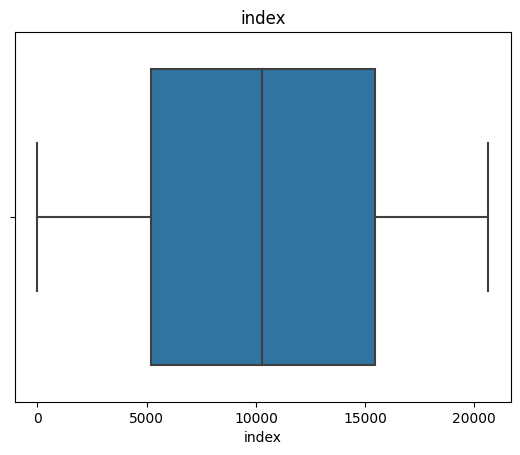

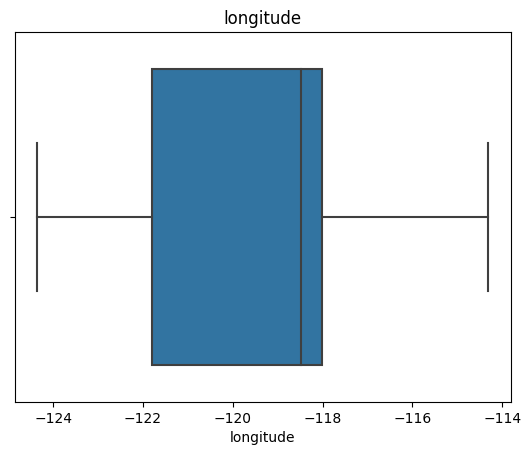

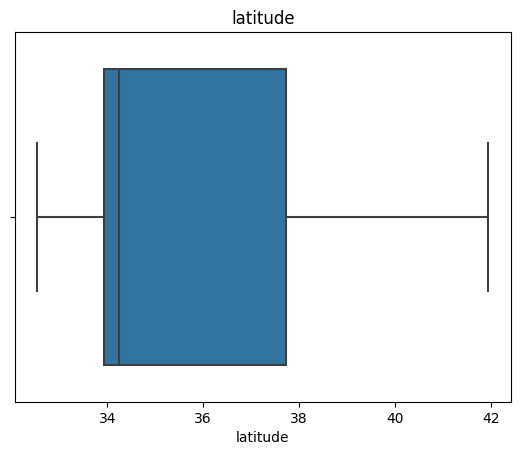

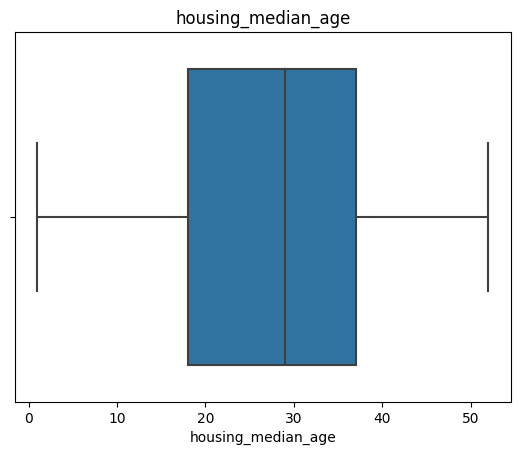

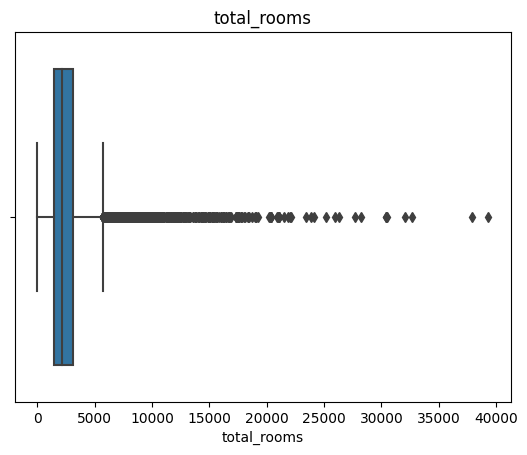

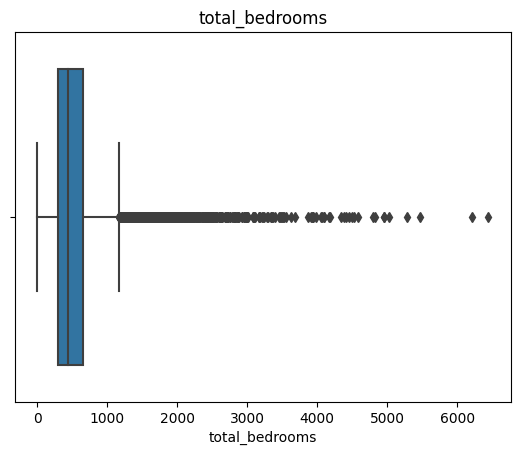

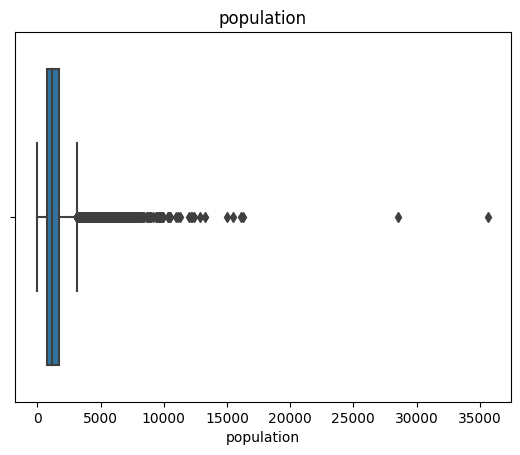

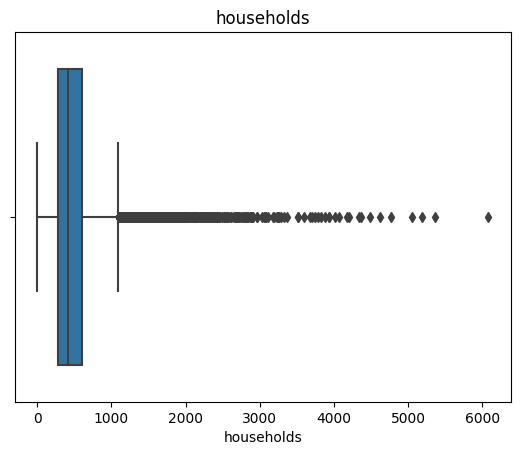

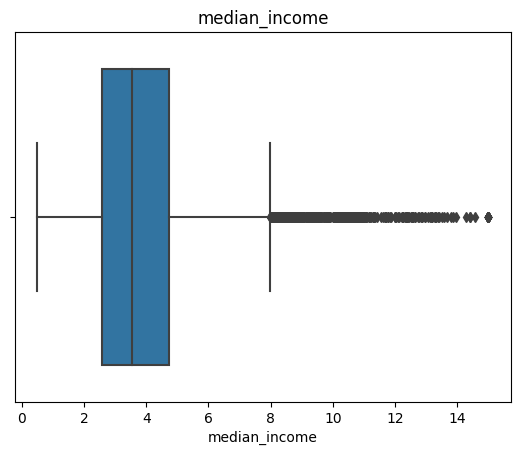

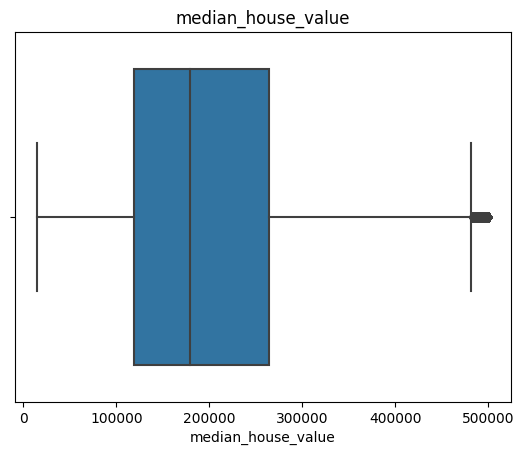

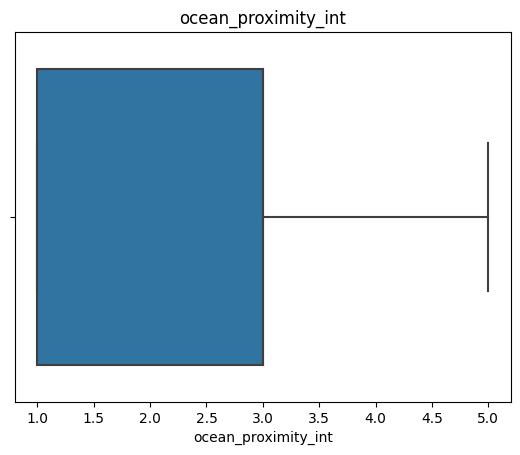

In [1109]:
box_with_outliers = plot_multiple_boxplots(data_good_type)

My outliers can skew the prediction of my model, but what can I do with them :

1) Imputing with median/mean.
- f we were talking about 3 or 4 values then this can be a compromise, not so with so many values as this will be misinforming the machine learning algorithm.

2) Dropping the records with outlying values.
- Sometimes outliers do occur dues to measurement or recording errors and dropping such can work, not so with our data seeing that its most likely not as a result of error. Hence, dropping them doesn’t sound well for this case, also, I think this will lead to loss of information which might be important in the learnings of the machine.

3)Normalization..

- y understanding of normalization is that it scales values into a range say 0–1, what that essentially means is that the extreme values will still lie in the extremes of 0.9 whereas the other values doing the 0.000’s. And this doesn’t really address the outlier problem !


And this is what brings us to the concept of winsorization.
According to wikipedia, the term is defined as the transformation of statistics by limiting extreme values in the statistical data to reduce the effect of possibly spurious outliers, in other words we replace extreme values with less extreme values.

### function qui drop les outliers

In [1110]:
def drop_outliers(df):
    """
    Drops outliers from a DataFrame based on the interquartile range method.
    Outliers are defined as values that are outside of the range of Q1 - 1.5 * IQR to Q3 + 1.5 * IQR,
    where Q1 is the first quartile, Q3 is the third quartile, and IQR is the interquartile range.
    """
    # Create a copy of the DataFrame to prevent modification of the original
    df = df.copy()
    
    # Iterate over each numeric column in the DataFrame
    for col in df.select_dtypes(include=['float', 'int']).columns:
        # Calculate the first and third quartiles, and the interquartile range
        Q1, Q3 = df[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        
        # Find the upper and lower bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Drop the rows that contain outliers in the current column
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        
    return df

In [1111]:
def drop_outliers_std(df, std_factor=3):
    """
    Drops outliers from a DataFrame based on the standard deviation method.
    Outliers are defined as values that are outside of the range of mean ± std_factor * std,
    where mean is the mean of the column, std is the standard deviation of the column.
    """
    # Create a copy of the DataFrame to prevent modification of the original
    df = df.copy()
    
    # Iterate over each numeric column in the DataFrame
    for col in df.select_dtypes(include=['float', 'int']).columns:
        # Calculate the mean and std of the column
        mean, std = df[col].mean(), df[col].std()
        
        # Find the upper and lower bounds for outliers
        lower_bound = mean - std_factor * std
        upper_bound = mean + std_factor * std
        
        # Drop the rows that contain outliers in the current column
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        
    return df

In [1112]:
df_no_out_1 = drop_outliers(data_good_type)
df_no_out = drop_outliers_std(data_good_type, std_factor=3)
df_no_out = df_no_out.drop(["ocean_proximity", "index"], axis = 1)

In [1113]:
df_no_out.shape

(15102, 10)

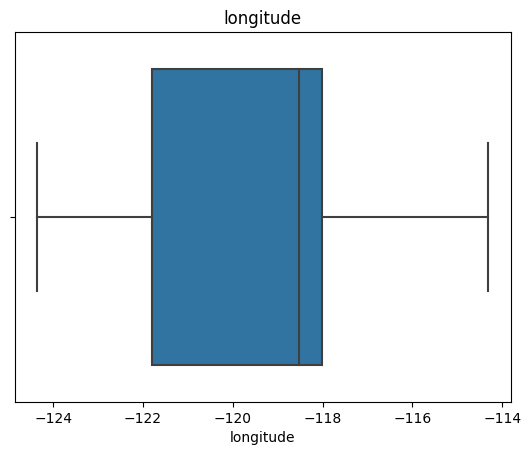

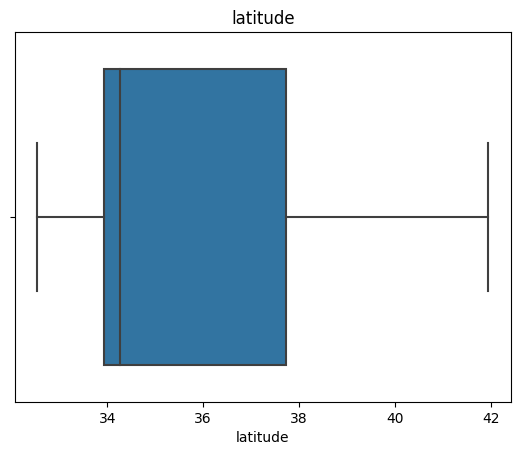

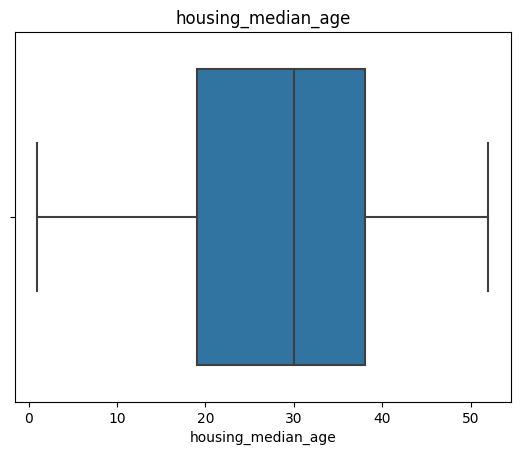

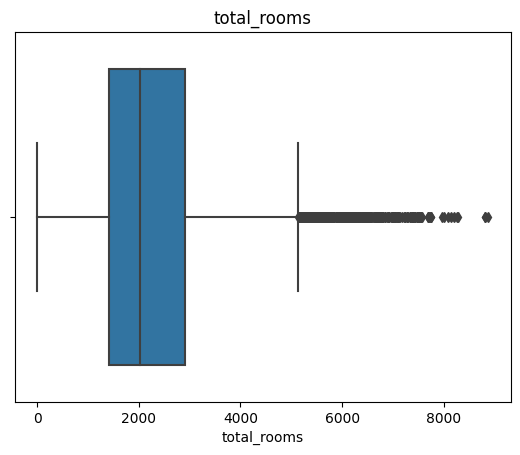

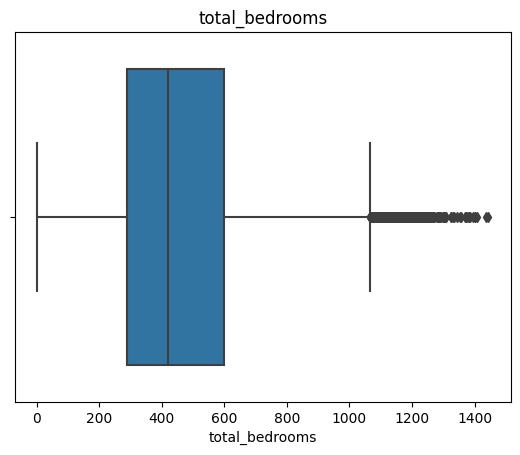

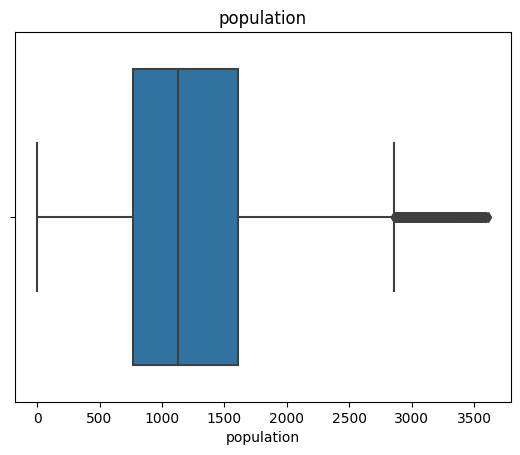

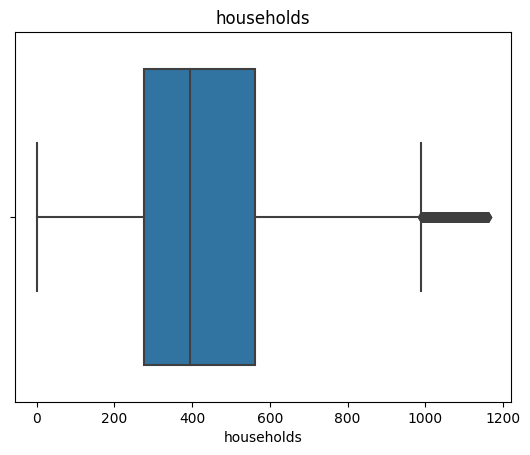

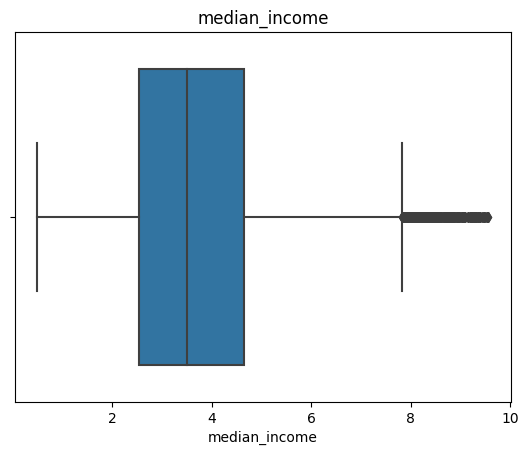

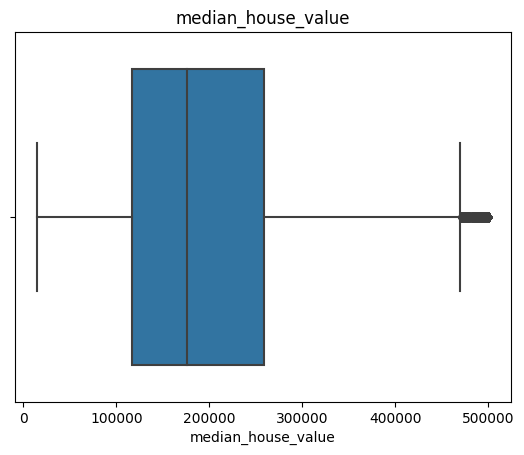

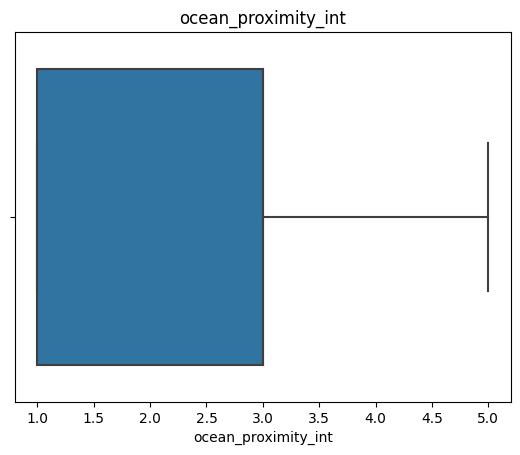

In [1114]:
box_without_outliers = plot_multiple_boxplots(df_no_out)

In [1115]:
from scipy.stats.mstats import winsorize

Je vais le faire colonne par colonne pour m'adapter aux grandeurs de chaque colonne

1) Je transforme mes colonnes en arrays

In [1116]:
# arr_housing_median_age = data_good_type["housing_median_age"].to_numpy()
# arr_total_rooms = data_good_type["total_rooms"].to_numpy()
# arr_total_bedrooms = data_good_type["total_bedrooms"].to_numpy()
# arr_population = data_good_type["population"].to_numpy()
# arr_households = data_good_type["households"].to_numpy()
# arr_median_income = data_good_type["median_income"].to_numpy()
# arr_median_house_value = data_good_type["median_house_value"].to_numpy()

2) J'applique le .winzorize à mes données 

In [1117]:
# arr_no_out_hma = winsorize(arr_housing_median_age, (0., 0.05))
# arr_no_out_tr = winsorize(arr_total_rooms, (0., 0.05))
# arr_no_out_tb = winsorize(arr_total_bedrooms, (0., 0.05))
# arr_no_out_p = winsorize(arr_population, (0., 0.05))
# arr_no_out_h = winsorize(arr_households, (0., 0.05))
# arr_no_out_mi = winsorize(arr_median_income, (0., 0.05))
# arr_no_out_mhv = winsorize(arr_median_house_value, (0., 0.05))

je rentransforme mes arrays en dataframe

In [1118]:
# df_no_out_hma = pd.DataFrame(arr_no_out_hma, columns = ["housing_median_age"])
# df_no_out_tr = pd.DataFrame(arr_no_out_tr, columns = ["total_rooms"])
# df_no_out_tb = pd.DataFrame(arr_no_out_tb, columns = ["total_bedrooms"])
# df_no_out_p = pd.DataFrame(arr_no_out_p, columns = ["population"])
# df_no_out_h = pd.DataFrame(arr_no_out_h, columns = ["households"])
# df_no_out_mi = pd.DataFrame(arr_no_out_mi, columns = ["median_income"])
# df_no_out_mhv = pd.DataFrame(arr_no_out_mhv, columns = ["median_house_value"])

Je join mes dataframes en un seul

In [1119]:
# df_gd_1 = data_good_type[["index", "latitude", "longitude", "ocean_proximity_int"]]
# df_no_out_0 = pd.concat([df_gd_1, df_no_out_hma], axis = 1)
# df_no_out_1 = pd.concat([df_no_out_0, df_no_out_tr], axis = 1)
# df_no_out_2 = pd.concat([df_no_out_1, df_no_out_tb], axis = 1)
# df_no_out_3 = pd.concat([df_no_out_2, df_no_out_p], axis = 1)
# df_no_out_4 = pd.concat([df_no_out_3, df_no_out_h], axis = 1)
# df_no_out_5 = pd.concat([df_no_out_4, df_no_out_mi], axis = 1)
# df_no_out = pd.concat([df_no_out_5, df_no_out_mhv], axis = 1)

In [1120]:
# df_no_out = df_no_out.dropna()
# df_no_out = df_no_out.astype({"index": object, "ocean_proximity_int": int})

# Scatter plot to see the distribution between two numerical variables

In [1121]:
df_no_out.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_int'],
      dtype='object')

In [1122]:
df_no_out

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_int
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,1
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,3
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,1
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,3
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,1
...,...,...,...,...,...,...,...,...,...,...
16507,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,1
16508,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,2
16509,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,1
16510,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,3


<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>

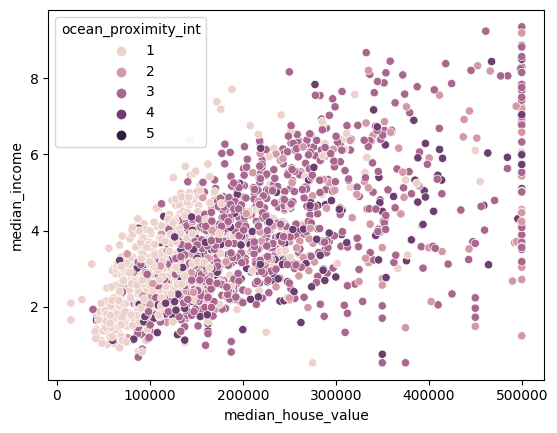

In [1123]:
df_mhv_sample = df_no_out["median_house_value"].sample(5000)
df_mi_sample = df_no_out["median_income"].sample(5000)

sns.scatterplot(x= df_mhv_sample, y= df_mi_sample, hue= df_no_out["ocean_proximity_int"])

# Normalization 

In [1124]:
df_no_out

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_int
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,1
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,3
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,1
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,3
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,1
...,...,...,...,...,...,...,...,...,...,...
16507,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,1
16508,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,2
16509,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,1
16510,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,3


In [1125]:
from sklearn.preprocessing import MinMaxScaler

Je vais créer une fonction qui va prendre en entrée un DataFrame qui va utiliser .plot de matplotlib pour plots des histogrammes pour chaque colonne numérique, pour vérifier si elles suivent une distribution normal

In [1126]:
def plot_multiple_histplots(df):
    numeric_cols = df.select_dtypes(include='number').columns
    for col in numeric_cols:
        df[col].plot(kind='hist', color='purple', edgecolor='black', figsize=(8,5))
        plt.title(col)
        plt.show()

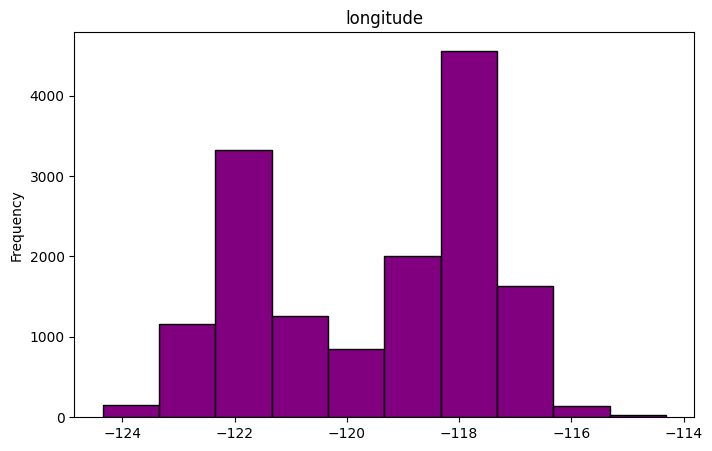

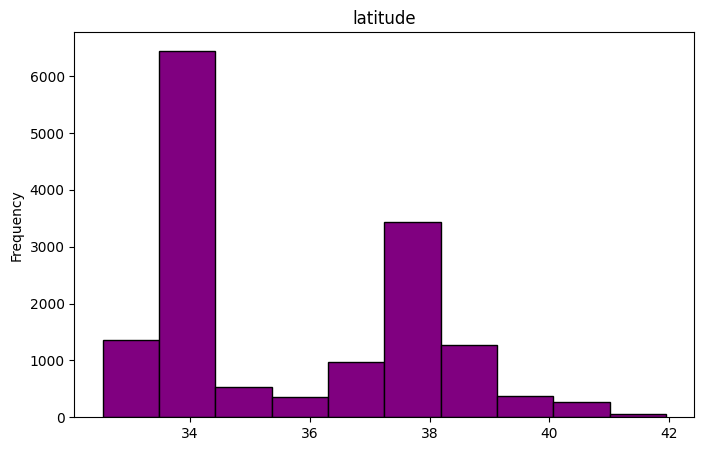

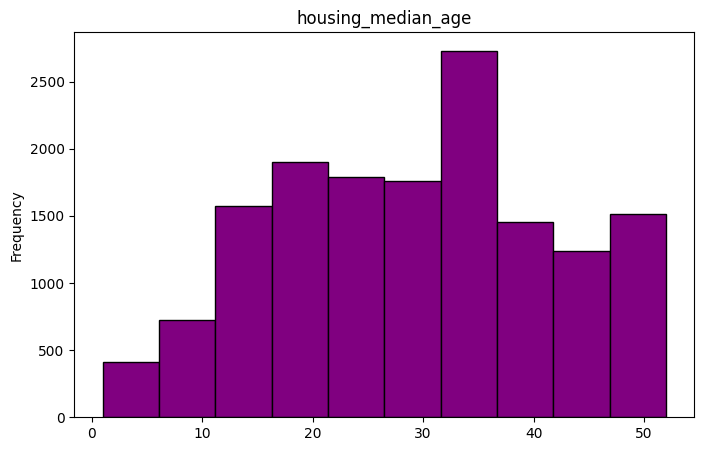

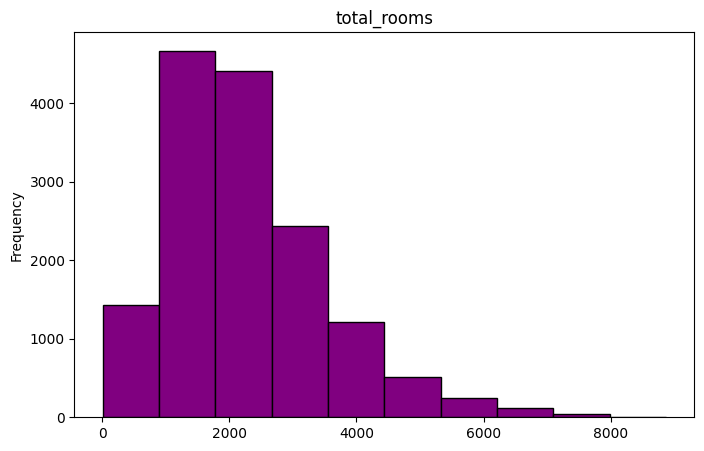

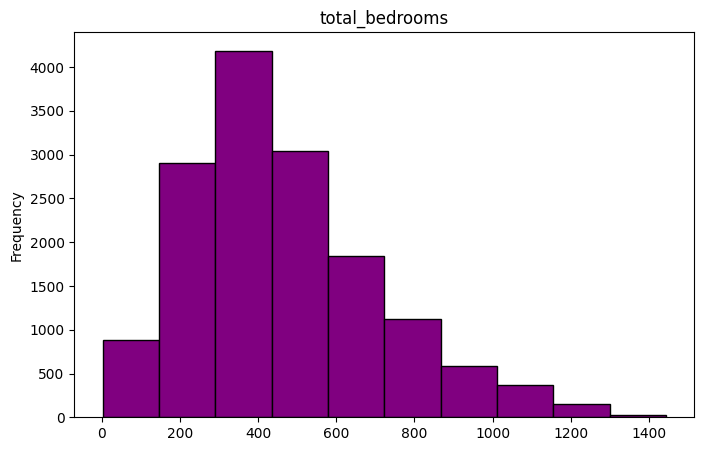

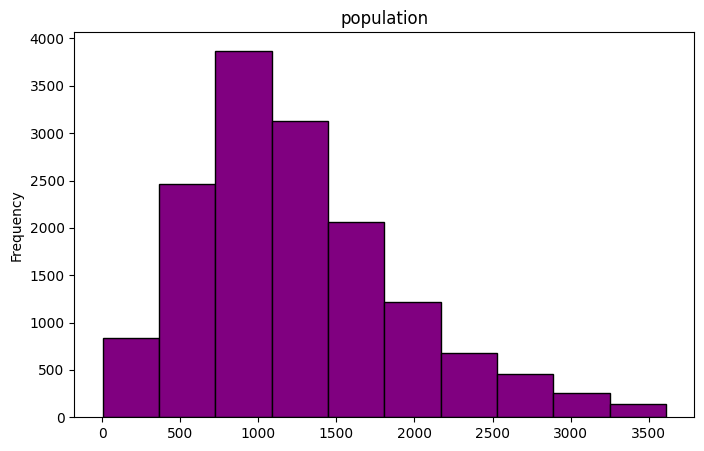

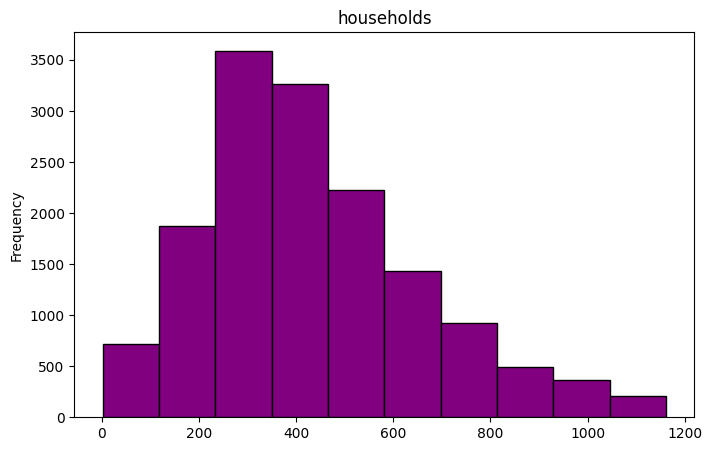

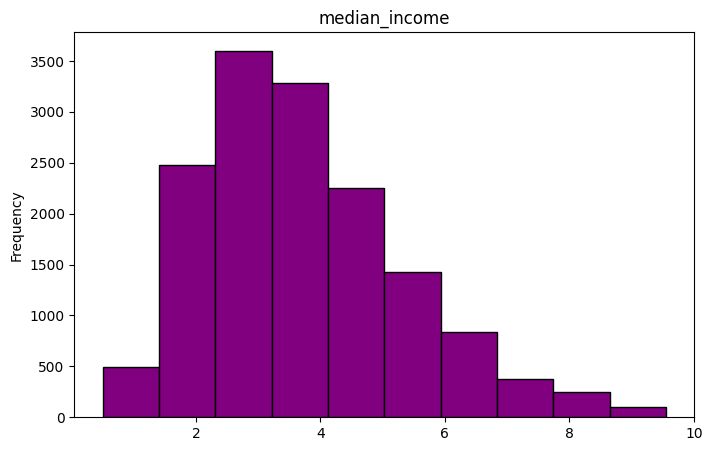

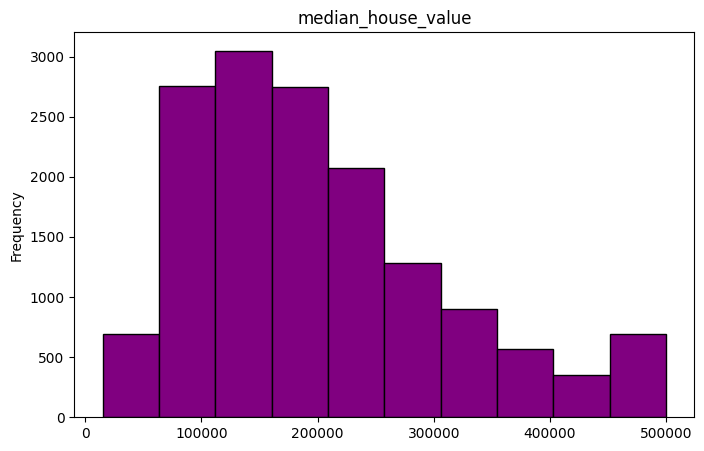

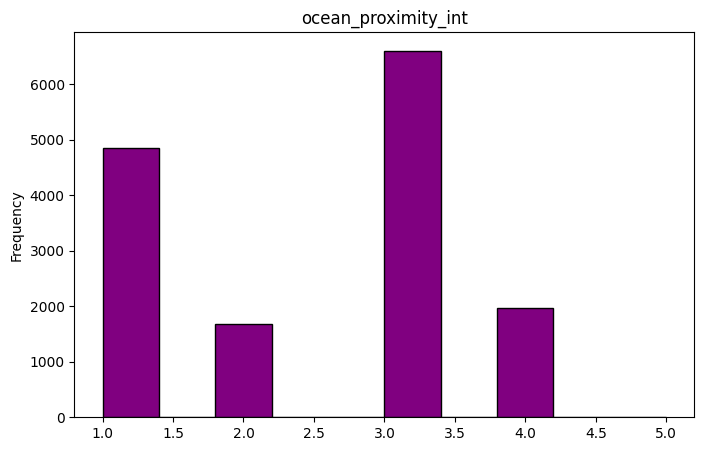

In [1127]:
plot_multiple_histplots(df_no_out)

In [1128]:
arr_norm = MinMaxScaler().fit_transform(df_no_out)

In [1129]:
df_norm = pd.DataFrame(arr_norm,
                       columns=[
                           "longitude", "latitude","ocean_proximity_int",
                           "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income",
                           "median_house_value"
                       ])

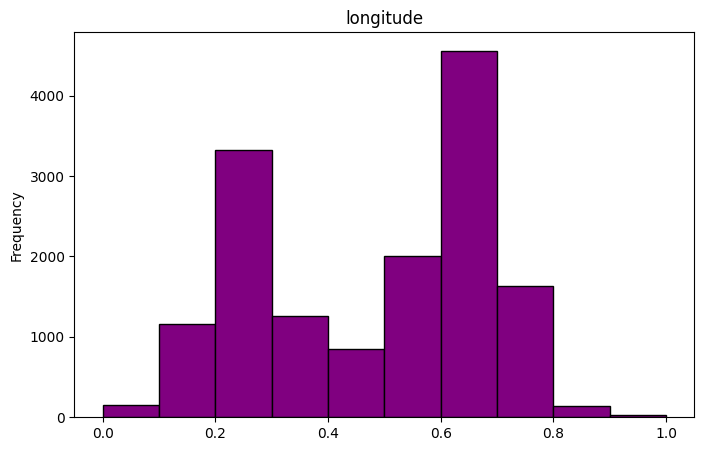

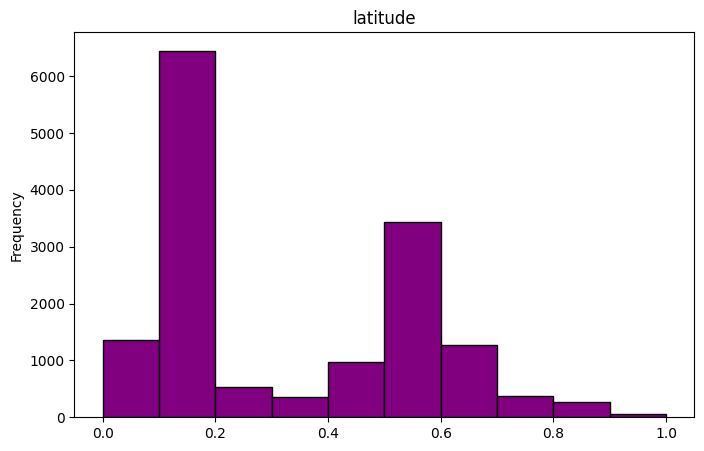

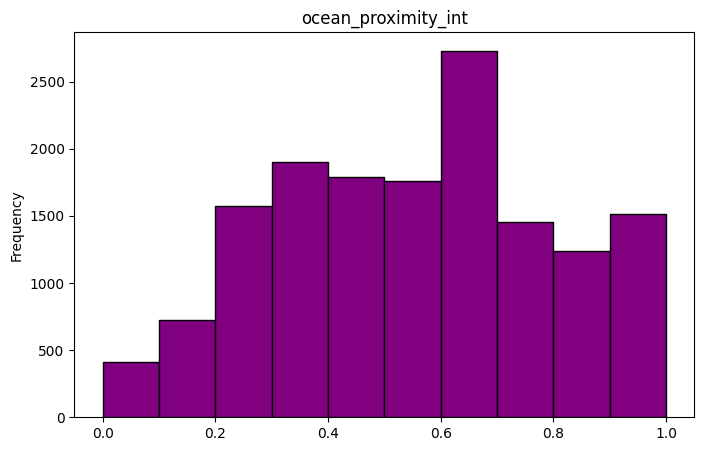

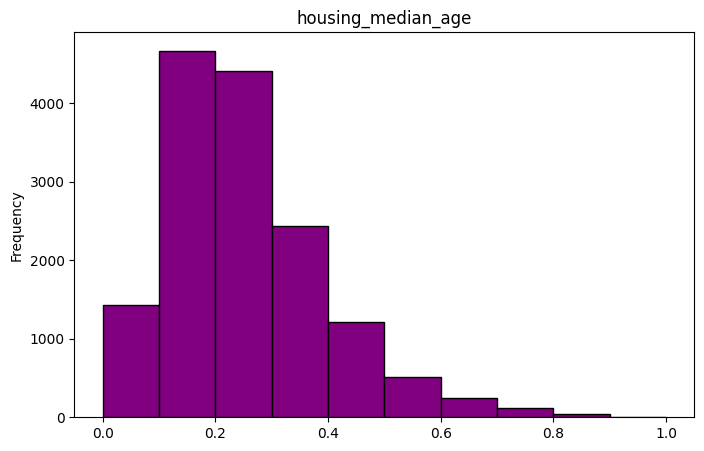

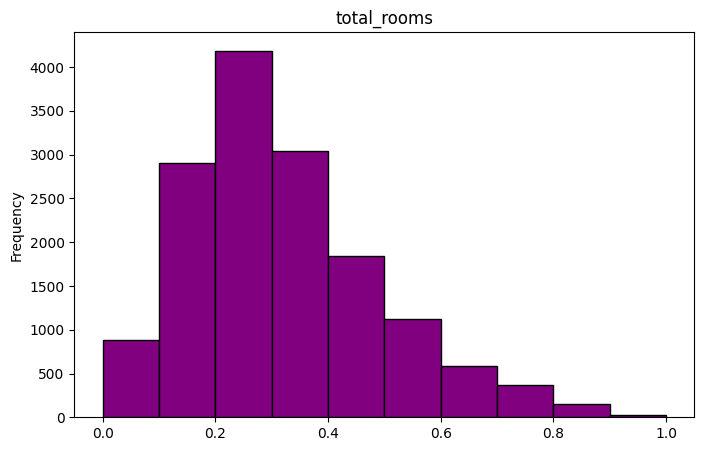

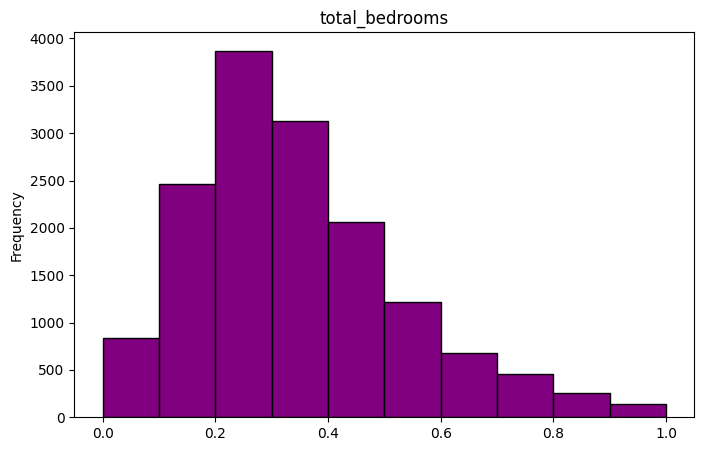

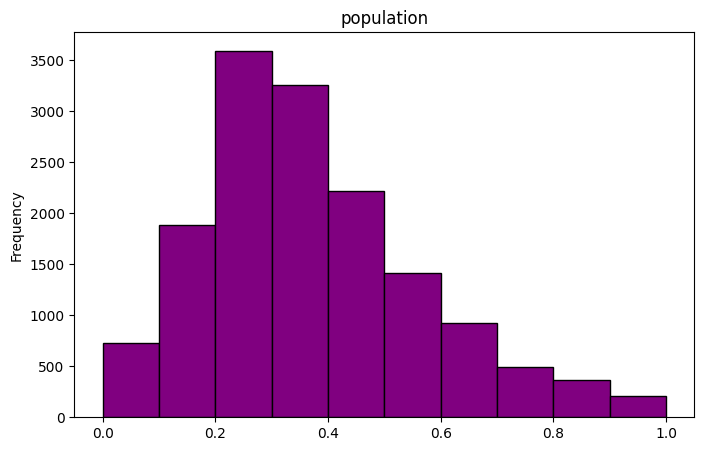

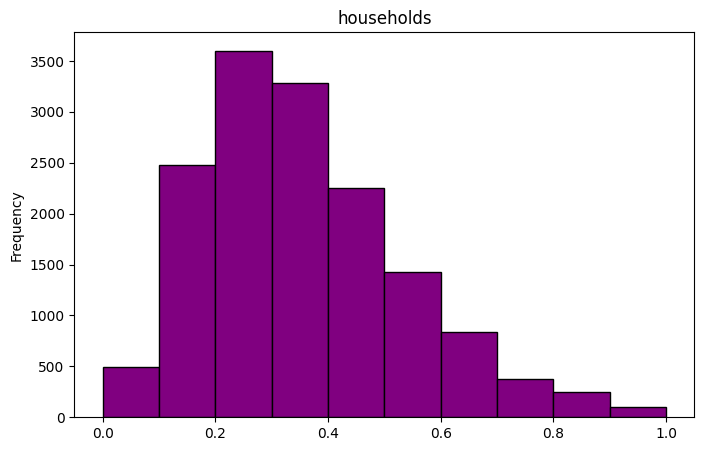

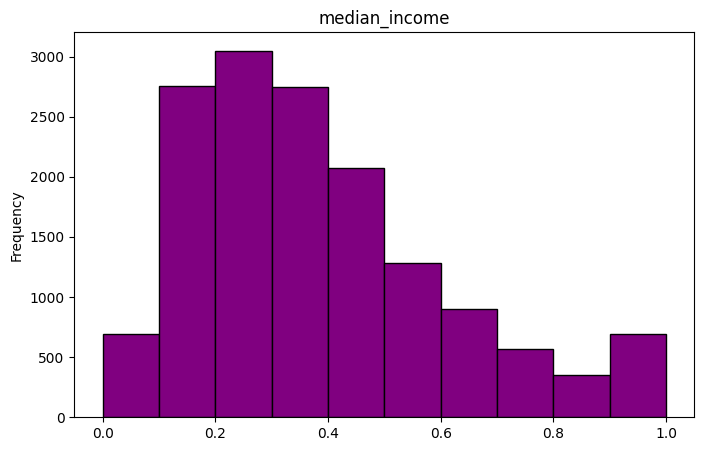

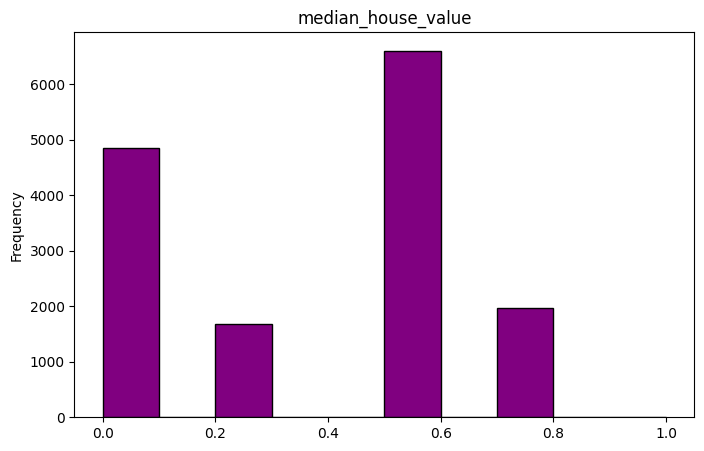

In [1130]:
plot_multiple_histplots(df_norm)

# Standardization

In [1131]:
from sklearn.preprocessing import StandardScaler

In [1145]:
arr_standard = StandardScaler().fit_transform(df_good)

In [1146]:
df_standard = pd.DataFrame(arr_standard,
                       columns=[
                           "longitude", "latitude","ocean_proximity_int",
                           "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income",
                           "median_house_value"
                       ])

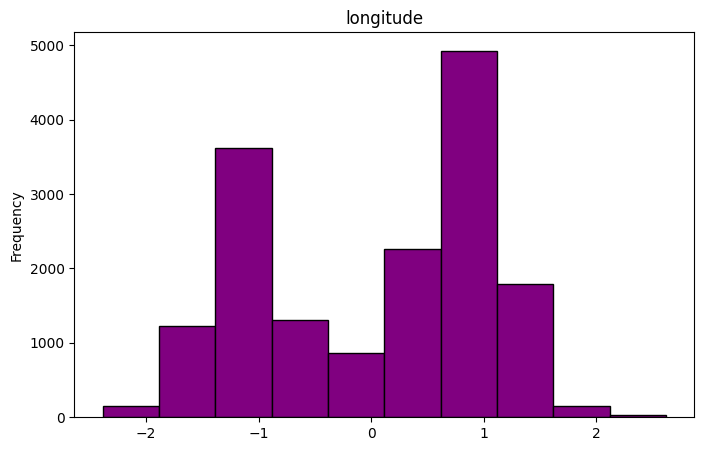

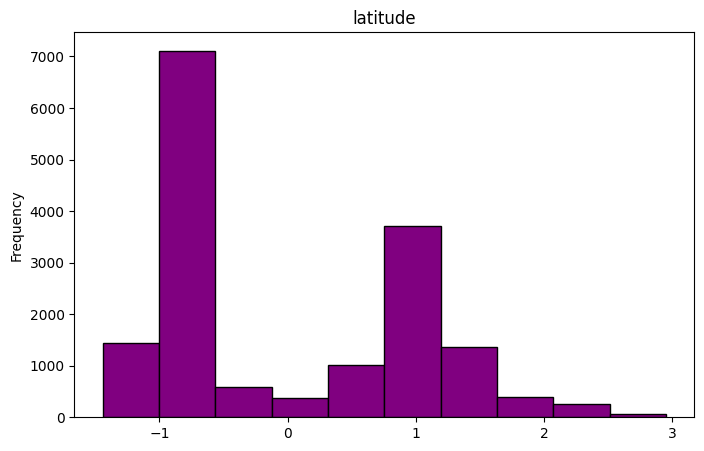

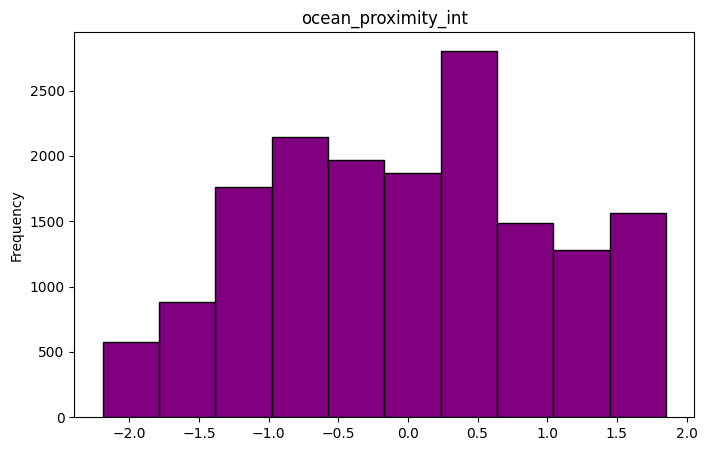

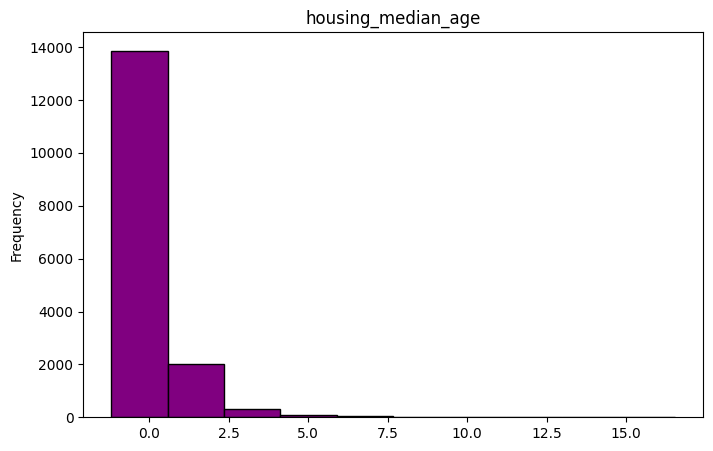

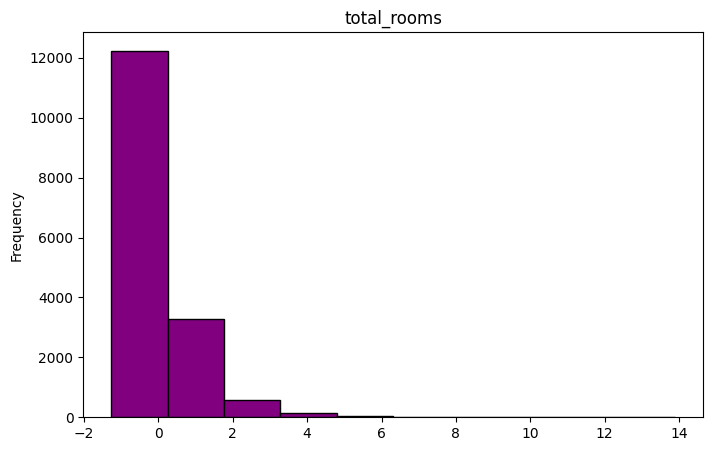

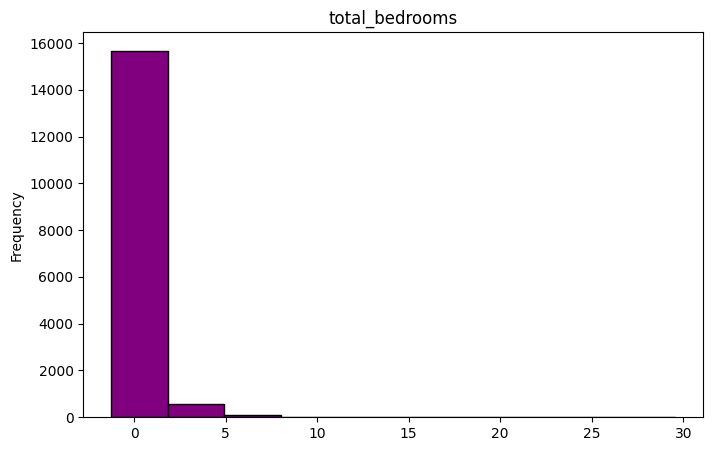

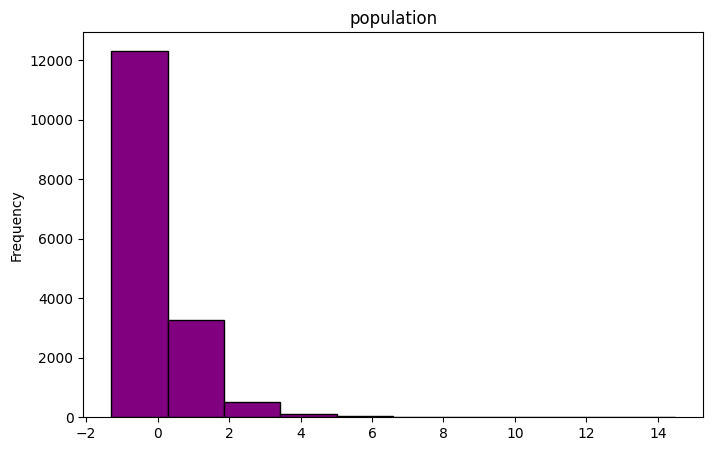

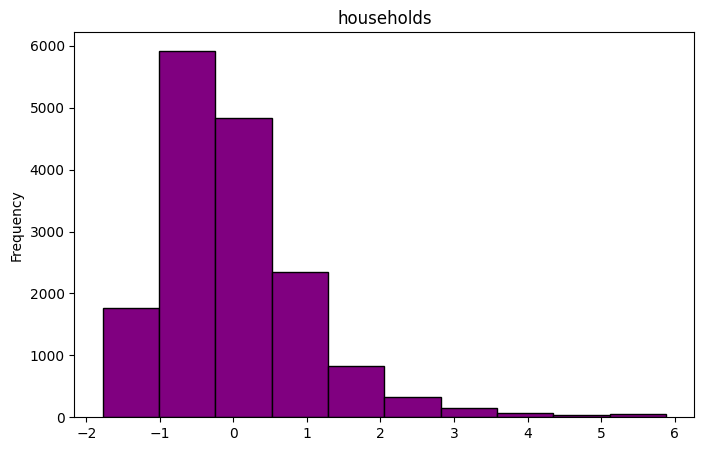

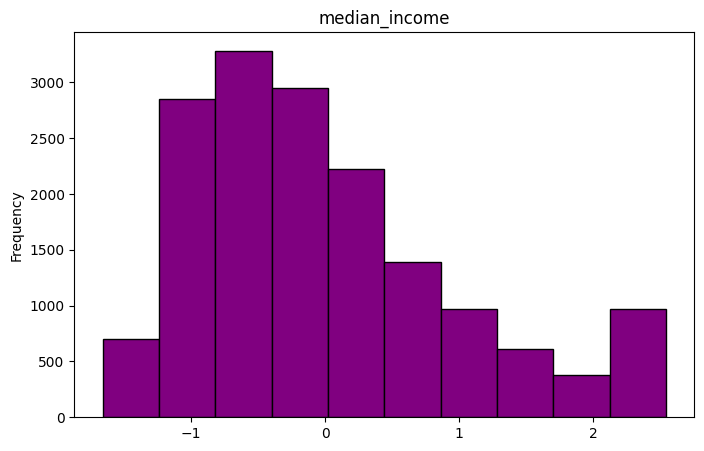

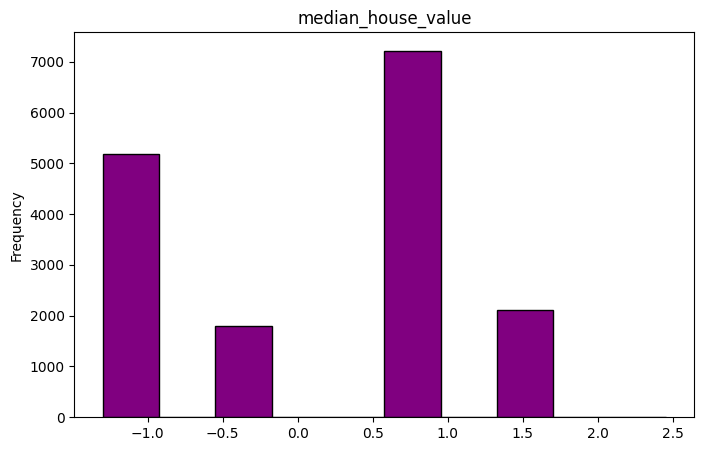

In [1147]:
plot_multiple_histplots(df_standard)

In [1149]:
df_export = df_good.to_csv(r'data/data_clean.csv', index=False)